In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# screening the missing value
import missingno as msno

# Using for modeling
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,Ridge,Lasso,LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,plot_confusion_matrix,f1_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,RandomForestClassifier

from imblearn.over_sampling import SMOTE
import time

from imblearn.pipeline import Pipeline

# Data import 

In [56]:
df = pd.read_csv('./data/cleand_df.csv')

In [57]:
df.isnull().sum()

Unnamed: 0                               0
age                                      0
capital-gain                             0
hours-per-week                           0
wage                                     0
marital-status_ Married-AF-spouse        0
marital-status_ Married-civ-spouse       0
marital-status_ Married-spouse-absent    0
marital-status_ Never-married            0
marital-status_ Separated                0
marital-status_ Widowed                  0
relationship_ Not-in-family              0
relationship_ Other-relative             0
relationship_ Own-child                  0
relationship_ Unmarried                  0
relationship_ Wife                       0
sex_ Male                                0
workclass_ Federal-gov                   0
workclass_ Local-gov                     0
workclass_ Never-worked                  0
workclass_ Private                       0
workclass_ Self-emp-inc                  0
workclass_ Self-emp-not-inc              0
workclass_ 

In [58]:
df.drop(columns='Unnamed: 0',inplace=True)

In [59]:
df.shape

(6324, 58)

In [60]:
df.dtypes

age                                      int64
capital-gain                             int64
hours-per-week                           int64
wage                                     int64
marital-status_ Married-AF-spouse        int64
marital-status_ Married-civ-spouse       int64
marital-status_ Married-spouse-absent    int64
marital-status_ Never-married            int64
marital-status_ Separated                int64
marital-status_ Widowed                  int64
relationship_ Not-in-family              int64
relationship_ Other-relative             int64
relationship_ Own-child                  int64
relationship_ Unmarried                  int64
relationship_ Wife                       int64
sex_ Male                                int64
workclass_ Federal-gov                   int64
workclass_ Local-gov                     int64
workclass_ Never-worked                  int64
workclass_ Private                       int64
workclass_ Self-emp-inc                  int64
workclass_ Se

# Modeling

In [61]:
X = df.drop(columns='wage')
y= df['wage']

In [62]:
# Baseline score
y.value_counts(normalize=True).mul(100).round(2)

0    75.98
1    24.02
Name: wage, dtype: float64

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [64]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4743, 57), (1581, 57), (4743,), (1581,))

In [65]:
# Scale
sc= StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Smote
sm = SMOTE(random_state=42, n_jobs= -1, )
X_train_smote, y_train_smote = sm.fit_resample(X_train_sc, y_train)

# Instantiate Logistic regression with Ridge penalty
logreg = LogisticRegression(penalty ='l2',solver='saga')




In [66]:
# fit scaled data
logreg.fit(X_train_smote,y_train_smote)

LogisticRegression(solver='saga')

In [67]:
# Train acc
logreg.score(X_train_smote,y_train_smote)

0.8331944444444445

In [68]:
# Test acc
logreg.score(X_test_sc,y_test)

0.8096141682479443

In [69]:
# Predict y
y_pred =logreg.predict(X_test_sc)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1205
           1       0.57      0.83      0.67       376

    accuracy                           0.81      1581
   macro avg       0.75      0.82      0.77      1581
weighted avg       0.85      0.81      0.82      1581



In [71]:
# coefficient dataframe
logreg_coef = pd.DataFrame(logreg.coef_,columns=sc.get_feature_names_out()).T.sort_values(by=0,ascending=False)

# Label the color the each coefficient
color = ['red' if x < 0 else 'blue' for x in logreg_coef[0]]

# Assign the color_list to new column
logreg_coef['color'] = color

logreg_coef.head()

,0,color
marital-status_ Married-civ-spouse,0.986614,blue
capital-gain,0.817630,blue
education-num_13,0.577427,blue
hours-per-week,0.536835,blue
age,0.511331,blue


In [72]:
# Select the highest values whether negative or positive
abs(logreg_coef[0]).sort_values(ascending=False)[:10].index

Index(['marital-status_ Married-civ-spouse', 'capital-gain',
       'education-num_13', 'hours-per-week', 'age', 'relationship_ Own-child',
       'education-num_14', 'education-num_10', 'occupation_ Exec-managerial',
       'workclass_ Private'],
      dtype='object')

Text(0.5, 1.0, 'Features importance of wage > 50K')

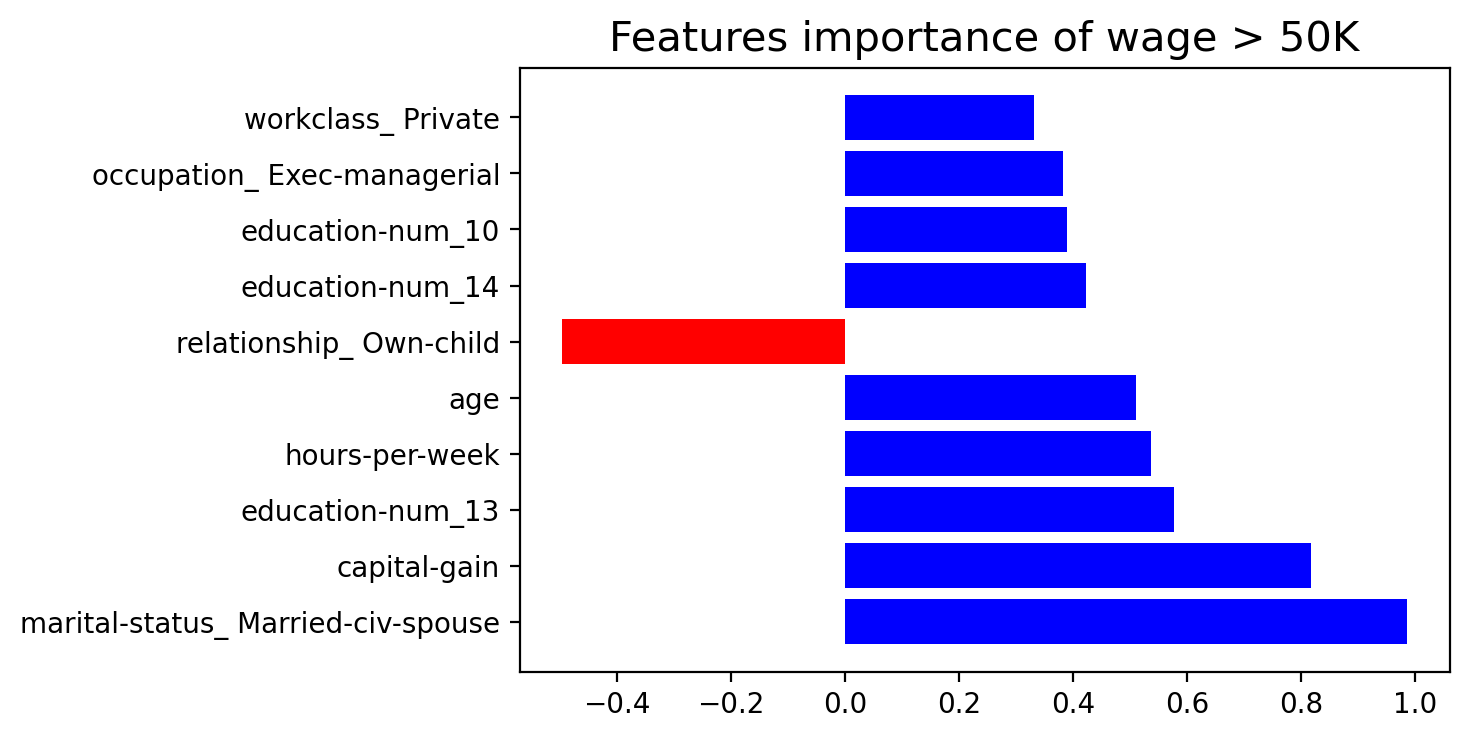

In [73]:
# Plot the coefficient of top 10 highest coefficient 
plt.figure(dpi=200)
plt.barh(logreg_coef.loc[['marital-status_ Married-civ-spouse', 'capital-gain',
       'education-num_13', 'hours-per-week', 'age', 'relationship_ Own-child',
       'education-num_14', 'education-num_10', 'occupation_ Exec-managerial',
       'workclass_ Private']].index,logreg_coef.loc[['marital-status_ Married-civ-spouse', 'capital-gain',
       'education-num_13', 'hours-per-week', 'age', 'relationship_ Own-child',
       'education-num_14', 'education-num_10', 'occupation_ Exec-managerial',
       'workclass_ Private']][0],color=logreg_coef.loc[['marital-status_ Married-civ-spouse', 'capital-gain',
       'education-num_13', 'hours-per-week', 'age', 'relationship_ Own-child',
       'education-num_14', 'education-num_10', 'occupation_ Exec-managerial',
       'workclass_ Private']]['color'])
plt.title('Features importance of wage > 50K',size=15)

# Test data

In [79]:
test_data = pd.read_csv('./data/test_data.csv')


name_2 = ['Other' if x in [' South', ' Jamaica',
       ' India', ' China', ' Puerto-Rico', ' England', ' Cuba', ' Italy',
       ' Poland', ' Japan', ' Haiti', ' Guatemala', ' Columbia', ' Taiwan',
       ' Iran', ' Peru', ' France', ' Vietnam', ' Cambodia', ' Nicaragua',
       ' Outlying-US(Guam-USVI-etc)', ' Portugal', ' Hong', ' Scotland',
       ' Ecuador', ' Yugoslavia', ' Greece', ' Hungary', ' Trinadad&Tobago',
       ' Ireland', ' Thailand', ' Laos', ' Honduras'] else x for x in test_data['native-country'].values]

test_data['native-country'] = name_2





# Dummies
test_data = pd.get_dummies(test_data,columns=['education-num', 'marital-status',
       'relationship', 'sex'],drop_first=True)
test_data = pd.get_dummies(test_data,columns=['workclass','occupation','native-country'])



# Drop
test_data.drop(columns=['workclass_ ?','occupation_ ?','native-country_ ?'],inplace=True)
test_data.drop(columns=['education'],inplace=True)
test_data.drop(columns=['fnlwgt','capital-loss'],inplace=True)
test_data.drop(columns=['education-num_2','education-num_3','education-num_4'],inplace=True)
# scale test

test_data = sc.transform(test_data)


In [80]:
y_pred_test =logreg.predict(test_data)

In [81]:
y_pred_test.shape

(16281,)

In [82]:
pd.DataFrame({'wage':y_pred_test}).to_csv('BL_BRID_SR_predict.csv',index=False)

# Gridsearch GradientBoosting

In [110]:

t0 = time.time()

pipe = Pipeline([('sc',StandardScaler()),('sm',SMOTE()),('gd',GradientBoostingClassifier())])

# parameters
param = { 'gd__learning_rate':[0.2,0.5,1],
    'gd__n_estimators':[50,100],
    'gd__min_samples_split':[2,5],
    'gd__min_samples_leaf':[1,3,5],
    'gd__max_features':[1,3,5],
    'gd__ccp_alpha':[0., 0.01,]}
    
gs = GridSearchCV(pipe,param_grid=param,cv=3,verbose=1)
    
    #fit
gs.fit(X_train,y_train)
    #pred
pred = gs.predict(X_test)
    
print(classification_report(y_test,y_pred))
    



print(f'\nIt\'s take :{time.time()-t0} seconds')

Fitting 3 folds for each of 216 candidates, totalling 648 fits
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1205
           1       0.57      0.83      0.67       376

    accuracy                           0.81      1581
   macro avg       0.75      0.82      0.77      1581
weighted avg       0.85      0.81      0.82      1581


It's take :102.30624604225159 seconds


In [111]:
gs.best_params_

{'gd__ccp_alpha': 0.0,
 'gd__learning_rate': 0.5,
 'gd__max_features': 5,
 'gd__min_samples_leaf': 3,
 'gd__min_samples_split': 2,
 'gd__n_estimators': 100}

In [112]:
gs.score(X_train,y_train)


0.8640101201771031

In [113]:
gs.score(X_test,y_test)

# overfit and the f1-score didn't improve

0.8285895003162556